In [1]:
# 天池 - 零基础入门NLP - 新闻文本分类
# https://tianchi.aliyun.com/competition/entrance/531810/rankingList
import pandas as pd

test_data = pd.read_csv("/Users/kj/Documents/NLP_Datasets/tianchi/news_class/test_a.csv", sep='\t')
test_data.head()

train_data = pd.read_csv("/Users/kj/Documents/NLP_Datasets/tianchi/news_class/train_set.csv", sep='\t')
# 统计词长
train_data['text_len'] = train_data['text'].apply(lambda x: len(x.split(' ')))
train_data['text_len'].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

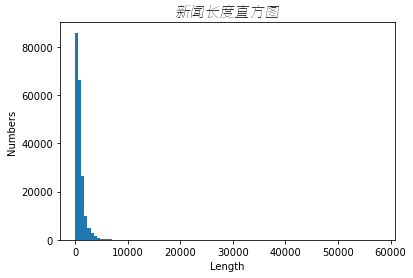

In [2]:
# 绘制句子长度的直方图
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname="/Users/kj/Documents/font/RuiZiChaoPaiChiGuangHei-Shan-XianXi(REEJI-FlashItalicGB-Flash-Thin)-2.ttf", size=15)
# 直方图
plt.hist(train_data['text_len'], bins=100)
plt.xlabel('Length')
plt.ylabel('Numbers')
plt.title("新闻长度直方图", fontproperties=font)
plt.show()

In [3]:
train_data.head()

,label,text,text_len
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307


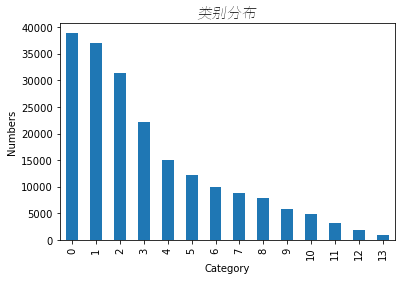

In [4]:
# 查看类别数据
train_data['label'].value_counts().plot(kind='bar')
plt.title("类别分布", fontproperties=font)
plt.xlabel("Category")
plt.ylabel("Numbers")
plt.show()

In [12]:
# 思路一：TFIDF + 岭回归
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

def count_rl():
    """
    词频 + 岭回归分类器
    """
    CountVec = CountVectorizer(max_features=4000)
    # 这里的train_text实际上保存了一个词频数量的矩阵
    train_text = CountVec.fit_transform(train_data.text)
    # print(train_text)
    words = CountVec.get_feature_names()
    # print("个数：{} 单词：{}".format(len(words), words))
    
    x_train, x_val, y_train, y_val  = train_test_split(train_text, train_data.label, test_size=0.25, random_state=0)
        
    clf = RidgeClassifier()
    clf.fit(x_train, y_train)
    
    val_pre = clf.predict(x_val)
    score_f1 = f1_score(y_val, val_pre, average='macro')
    
    print('CountVectorizer + RidgeClassifier : %.4f' % score_f1)
    
count_rl()
    

CountVectorizer + RidgeClassifier : 0.8229


In [14]:
# 思路二，采用TFIDF + 岭回归
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_rl():
    """
    TFIDF + 岭回归分类
    """
    tfidfVec = TfidfVectorizer(max_features=4000)
    train_tfidf = tfidfVec.fit_transform(train_data.text)
    
    x_train, x_val, y_train, y_val  = train_test_split(train_tfidf, train_data.label, test_size=0.25, random_state=0)
        
    clf = RidgeClassifier()
    clf.fit(x_train, y_train)
    
    val_pre = clf.predict(x_val)
    score_f1 = f1_score(y_val, val_pre, average='macro')
    
    print('Tfidf + RidgeClassifier : %.4f' % score_f1)
    
tfidf_rl()

Tfidf + RidgeClassifier : 0.8832
